In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns

In [2]:
df_ndsi = pd.read_csv(r'data\ndsi_summary.csv')
df_ndsi.drop(columns = [df_ndsi.columns[0]], inplace=True)

In [3]:
df_temp = pd.read_csv(r"data\temperature_data.csv")
df_temp.drop(columns = [df_temp.columns[0]], inplace=True)

In [4]:
df_temp

,date,Min Temp,Max Temp,Mean Temp
0,1951-01-01,2.680000,15.130000,8.905000
1,1951-01-02,3.030000,18.340000,10.685000
2,1951-01-03,2.910000,17.370001,10.140000
3,1951-01-04,3.170000,17.760000,10.465000
4,1951-01-05,3.650000,16.490000,10.070000
...,...,...,...,...
26658,2023-12-27,7.624851,18.110460,12.867656
26659,2023-12-28,7.640046,15.210753,11.425400
26660,2023-12-29,7.504602,15.522985,11.513794
26661,2023-12-30,7.527018,14.187593,10.857306


In [5]:
df_rain = pd.read_csv(r"data\rainfall_data.csv")
df_rain.drop(columns = [df_rain.columns[0]], inplace=True)

In [6]:
df_temp.rename(columns={'date': 'TIME'}, inplace=True)

In [7]:
df_merge = pd.merge(df_temp, df_rain, on='TIME')
df_merge

,TIME,Min Temp,Max Temp,Mean Temp,RAINFALL
0,1951-01-01,2.680000,15.130000,8.905000,0.0
1,1951-01-02,3.030000,18.340000,10.685000,0.0
2,1951-01-03,2.910000,17.370001,10.140000,0.0
3,1951-01-04,3.170000,17.760000,10.465000,0.0
4,1951-01-05,3.650000,16.490000,10.070000,0.0
...,...,...,...,...,...
26293,2022-12-27,5.252471,15.516814,10.384643,0.0
26294,2022-12-28,4.545312,17.423504,10.984408,0.0
26295,2022-12-29,5.690282,14.416164,10.053223,0.0
26296,2022-12-30,6.461596,15.595161,11.028379,0.0


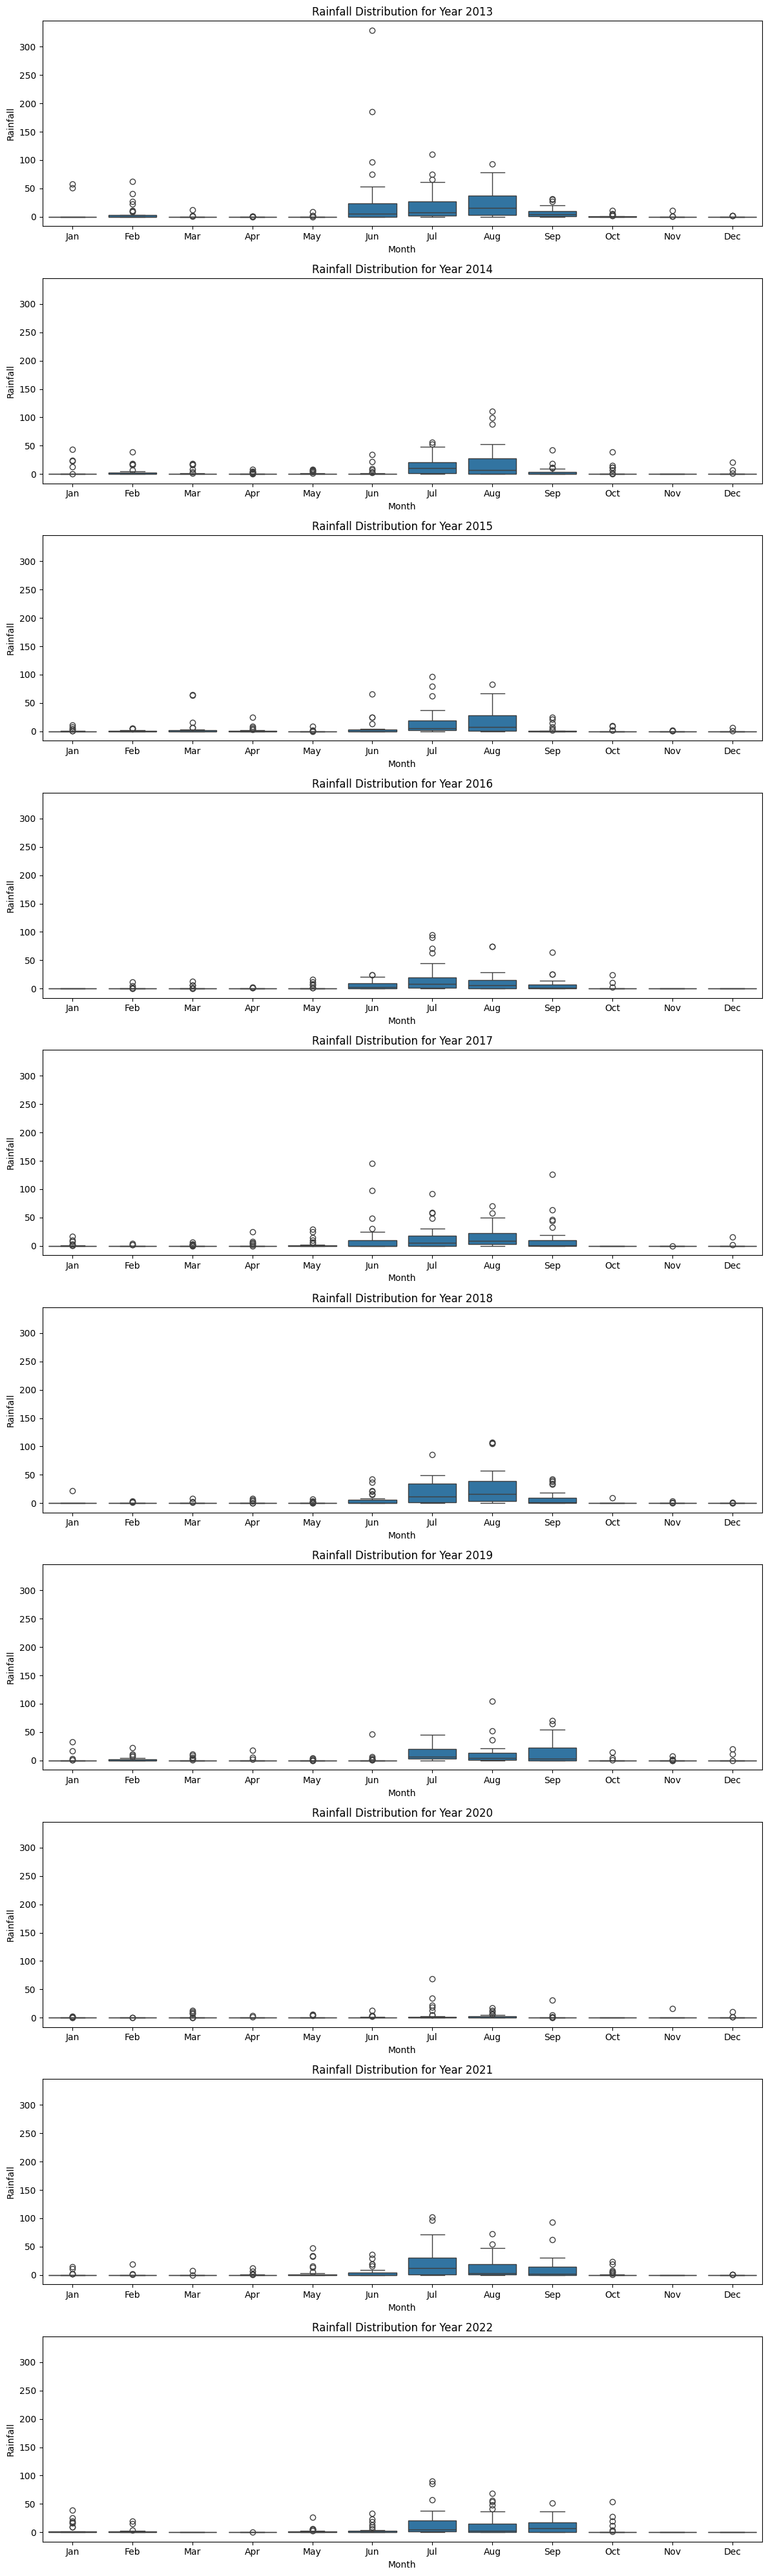

In [8]:
# Ensure 'TIME' is a datetime object
df_merge['TIME'] = pd.to_datetime(df_merge['TIME'])

# Extract 'Year' and 'Month' from the 'TIME' column
df_merge['Year'] = df_merge['TIME'].dt.year
df_merge['Month'] = df_merge['TIME'].dt.month

# Filter data for 2013 onward
df_merge_filtered = df_merge[df_merge['Year'] >= 2013]

# Get unique years from 2013 onward
unique_years = sorted(df_merge_filtered['Year'].unique())

# Set up the figure for subplots (one per year)
fig, axes = plt.subplots(len(unique_years), 1, figsize=(12, len(unique_years) * 4), sharey=True)

# Ensure `axes` is iterable, even if there's only one subplot
if len(unique_years) == 1:
    axes = [axes]

# Loop through each year and plot
for i, year in enumerate(unique_years):
    # Filter data for the specific year
    df_year = df_merge_filtered[df_merge_filtered['Year'] == year]
    
    # Plot boxplots for all 12 months of the year
    sns.boxplot(x='Month', y='RAINFALL', data=df_year, ax=axes[i])
    axes[i].set_title(f"Rainfall Distribution for Year {year}")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Rainfall")
    axes[i].set_xticks(range(12))  # Ensure x-ticks are for all 12 months
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

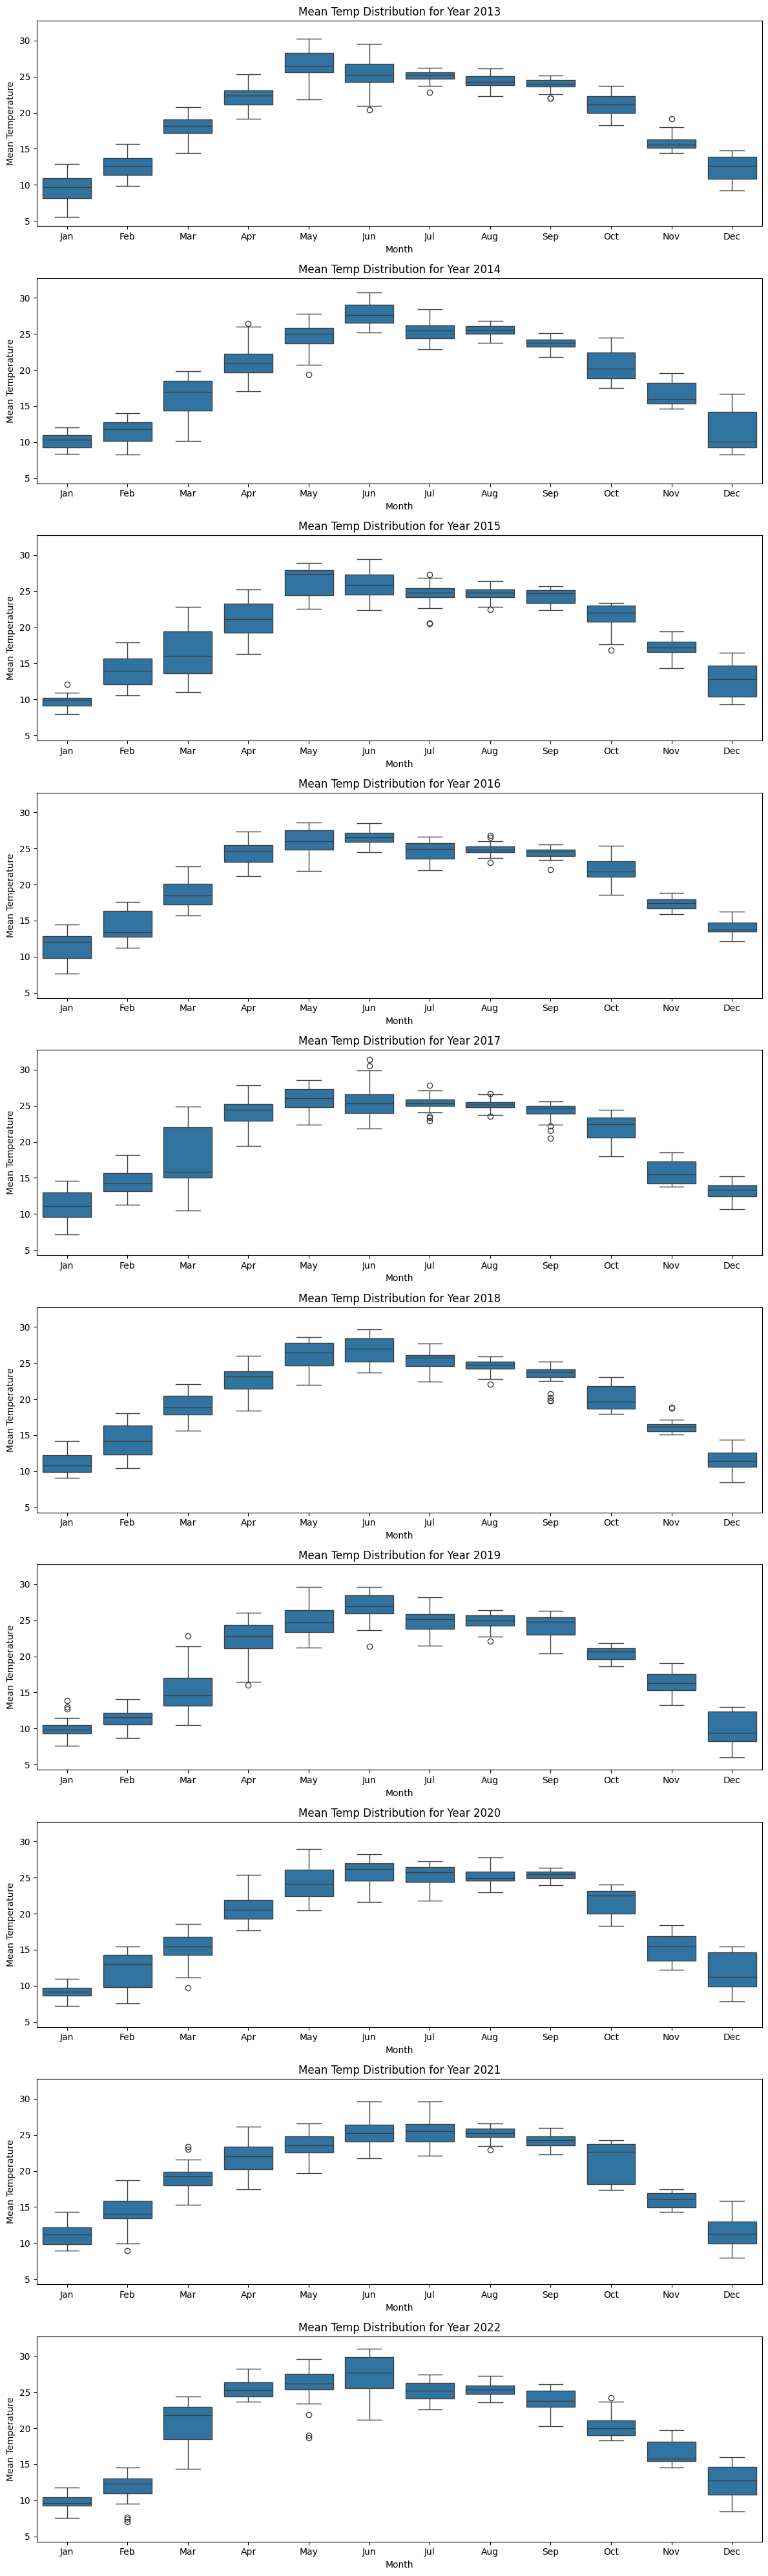

In [9]:
fig, axes = plt.subplots(len(unique_years), 1, figsize=(12, len(unique_years) * 4), sharey=True)

# Ensure `axes` is iterable, even if there's only one subplot
if len(unique_years) == 1:
    axes = [axes]

# Loop through each year and plot
for i, year in enumerate(unique_years):
    # Filter data for the specific year
    df_year = df_merge_filtered[df_merge_filtered['Year'] == year]
    
    # Plot boxplots for all 12 months of the year
    sns.boxplot(x='Month', y='Mean Temp', data=df_year, ax=axes[i])
    axes[i].set_title(f"Mean Temp Distribution for Year {year}")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Mean Temperature")
    axes[i].set_xticks(range(12))  # Ensure x-ticks are for all 12 months
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
df_merge.drop(columns=['Year', 'Month'], inplace=True)

In [11]:
df_merge['TIME'] = pd.to_datetime(df_merge['TIME'])
df_merge['year_month'] = df_merge['TIME'].dt.to_period('M')
monthly_data = df_merge.drop(columns=['TIME'])
monthly_data = monthly_data.groupby('year_month').mean()
df_merge.drop(columns=['year_month'], inplace=True)
print(monthly_data)

             Min Temp   Max Temp  Mean Temp   RAINFALL
year_month                                            
1951-01      3.967419  15.801935   9.884677   1.495463
1951-02      5.838214  19.208929  12.523571   0.647581
1951-03     10.764839  23.542581  17.153710   2.439290
1951-04     13.592667  26.587000  20.089833   0.139405
1951-05     19.187097  32.264839  25.725968   1.566789
...               ...        ...        ...        ...
2022-08     21.716387  28.869290  25.292838  13.266669
2022-09     20.038050  27.607955  23.823002  11.473897
2022-10     15.340149  25.500540  20.420344   3.875470
2022-11     10.477897  22.618728  16.548313   0.000000
2022-12      6.743360  18.606269  12.674815   0.000000

[864 rows x 4 columns]


In [12]:
df_merge['year'] = df_merge['TIME'].dt.to_period('Y')
yearly_data = df_merge.drop(columns=['TIME'])
yearly_data = yearly_data.groupby('year').mean()
df_merge.drop(columns=['year'], inplace=True)
print(yearly_data)

       Min Temp   Max Temp  Mean Temp  RAINFALL
year                                           
1951  14.310137  25.828137  20.069137  4.010587
1952  14.381284  25.828388  20.104836  4.623981
1953  14.853123  25.930548  20.391836  4.778490
1954  14.385726  25.159151  19.772438  5.834388
1955  14.112247  25.138329  19.625288  5.474035
...         ...        ...        ...       ...
2018  14.271693  25.934227  20.102960  5.519811
2019  14.263684  24.403127  19.333405  4.108388
2020  14.057682  24.611245  19.334464  1.116805
2021  14.558620  25.328709  19.943665  5.285882
2022  15.151315  25.707047  20.429181  4.746849

[72 rows x 4 columns]


In [13]:
yearly_data.index = yearly_data.index.year

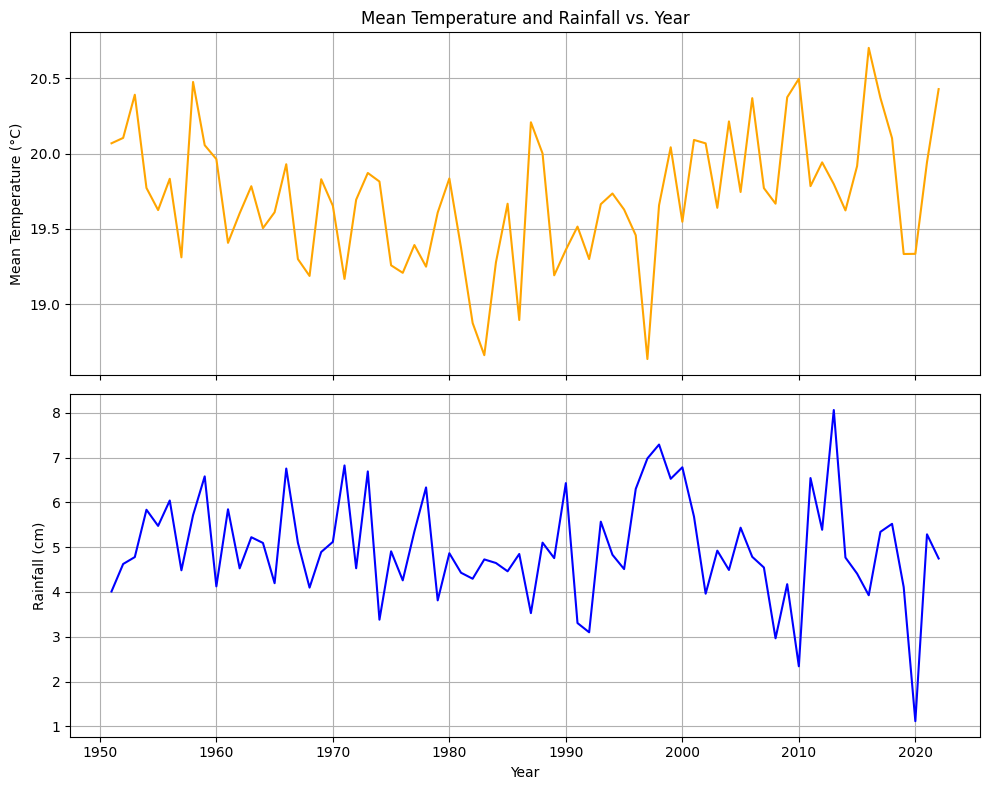

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Line plot for Mean Temp
ax[0].plot(yearly_data.index, yearly_data['Mean Temp'], color='orange', linestyle='-')
ax[0].set_ylabel('Mean Temperature (°C)')
ax[0].set_title('Mean Temperature and Rainfall vs. Year')
ax[0].grid(True)

# Line plot for Rainfall
ax[1].plot(yearly_data.index, yearly_data['RAINFALL'], color='blue', linestyle='-')
ax[1].set_ylabel('Rainfall (cm)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

plt.tight_layout()
plt.show()

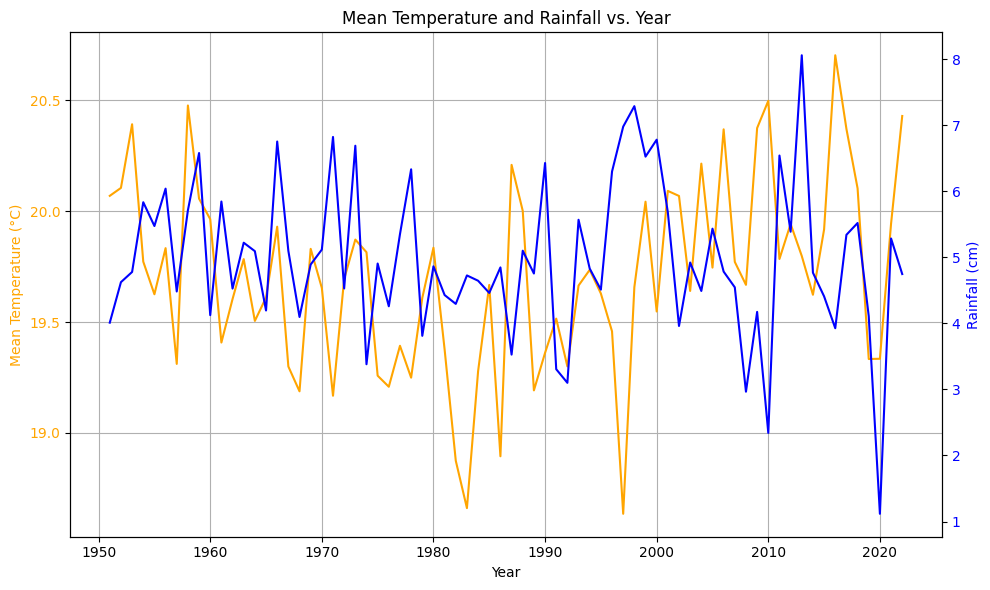

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(yearly_data.index, yearly_data['Mean Temp'], color='orange', linestyle='-', label='Mean Temperature')
ax1.set_ylabel('Mean Temperature (°C)', color='orange')
ax1.set_xlabel('Year')
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['RAINFALL'], color='blue', linestyle='-', label='Rainfall')
ax2.set_ylabel('Rainfall (cm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Mean Temperature and Rainfall vs. Year')
fig.tight_layout()
plt.show()

In [16]:
from scipy.stats import linregress
import pymannkendall as mk

In [17]:
yearly_data['Decade'] = (yearly_data.index // 10)*10
decade_results = {}

for decade, data in yearly_data.groupby('Decade'):
    start,end = data.index.min(), data.index.max()
    x_values = np.arange(start, end+1)
    temp_slope, temp_intercept = linregress(data.index, data['Mean Temp'])[0:2]
    rain_slope, rain_intercept = linregress(data.index, data['RAINFALL'])[0:2]
    temp_mk_test = mk.original_test(data['Mean Temp'])
    rain_mk_test = mk.original_test(data['RAINFALL'])

    decade_results[decade] = {
        'temp_slope': temp_slope,
        'temp_intercept': temp_intercept,
        'rain_slope': rain_slope,
        'rain_intercept': rain_intercept,
        'temp_mk_test': temp_mk_test,
        'rain_mk_test': rain_mk_test,
        'x_values': x_values
    }

full_temp_slope, full_temp_intercept = linregress(yearly_data.index, yearly_data['Mean Temp'])[0:2]
full_rain_slope, full_rain_intercept = linregress(yearly_data.index, yearly_data['RAINFALL'])[0:2]
x_values_full = np.arange(yearly_data.index.min(), yearly_data.index.max()+1)

full_temp_mk_test = mk.original_test(yearly_data['Mean Temp'])
full_rain_mk_test = mk.original_test(yearly_data['RAINFALL'])

In [18]:
decade_results

{1950: {'temp_slope': -0.017272081973083254,
  'temp_intercept': 53.72701828822305,
  'rain_slope': 0.2192546346806988,
  'rain_intercept': -423.36096922108095,
  'temp_mk_test': Mann_Kendall_Test(trend='no trend', h=False, p=0.7544541774940892, z=-0.3127716210856122, Tau=-0.1111111111111111, s=-4.0, var_s=92.0, slope=-0.027062731432933414, intercept=20.16462078299726),
  'rain_mk_test': Mann_Kendall_Test(trend='increasing', h=True, p=0.04760395472787149, z=1.9808869335422103, Tau=0.5555555555555556, s=20.0, var_s=92.0, slope=0.2778324947679198, intercept=4.362704528174371),
  'x_values': array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959], dtype=int64)},
 1960: {'temp_slope': -0.0225434193092952,
  'temp_intercept': 63.89877688446438,
  'rain_slope': 0.007382567239794426,
  'rain_intercept': -9.518424854859205,
  'temp_mk_test': Mann_Kendall_Test(trend='no trend', h=False, p=0.5915050369949166, z=-0.5366563145999494, Tau=-0.15555555555555556, s=-7.0, var_s=125.0, slope=-0.031

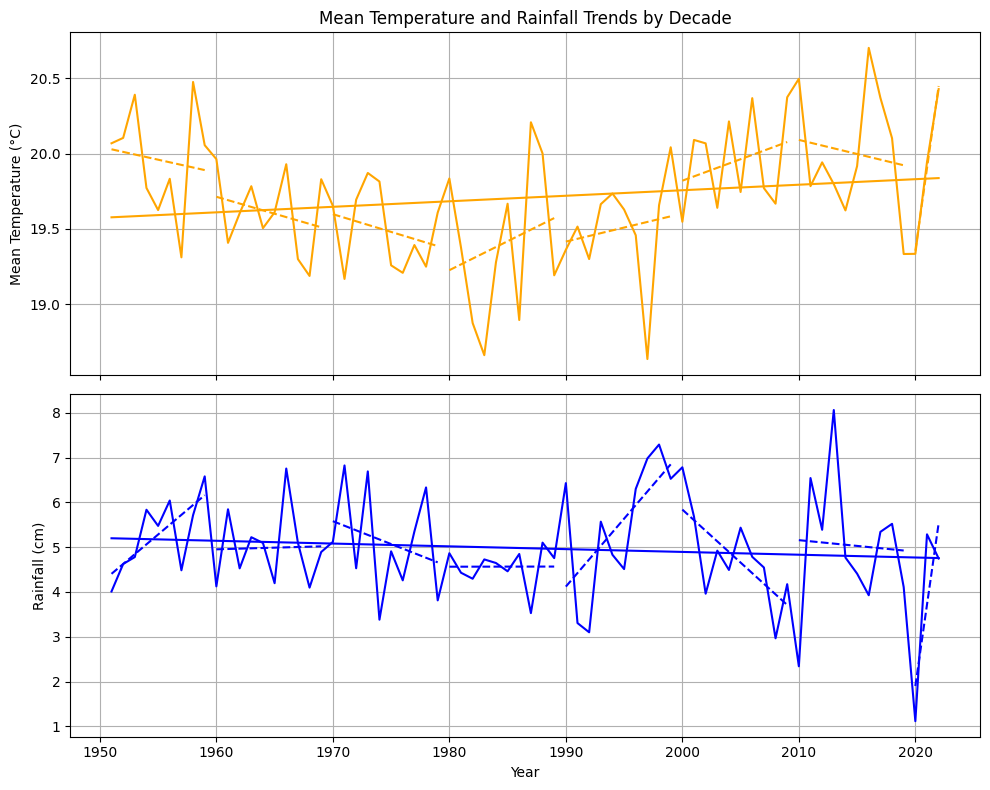

Mann-Kendall Test Results:
Full period Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.1233130559725113, z=1.5410153260700912, Tau=0.12441314553990611, s=318.0, var_s=42316.0, slope=0.0035813445081494906, intercept=19.55383907245407)
Full period Rainfall trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.42813722853210345, z=-0.7923832749193214, Tau=-0.06416275430359937, s=-164.0, var_s=42316.0, slope=-0.00441751547745475, intercept=4.995366570555511)
1950s Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.7544541774940892, z=-0.3127716210856122, Tau=-0.1111111111111111, s=-4.0, var_s=92.0, slope=-0.027062731432933414, intercept=20.16462078299726)
1950s Rainfall trend: Mann_Kendall_Test(trend='increasing', h=True, p=0.04760395472787149, z=1.9808869335422103, Tau=0.5555555555555556, s=20.0, var_s=92.0, slope=0.2778324947679198, intercept=4.362704528174371)
1960s Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.591505036994916

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(yearly_data.index, yearly_data['Mean Temp'], color='orange', linestyle='-', label='Mean Temperature')
ax[0].set_ylabel('Mean Temperature (°C)')
ax[0].set_title('Mean Temperature and Rainfall Trends by Decade')
ax[0].grid(True)

for decade, results in decade_results.items():
    temp_y_values = results['temp_slope'] * results['x_values'] + results['temp_intercept']
    ax[0].plot(results['x_values'], temp_y_values, color='orange', linestyle='--', label=f'{decade}s Temp Trend')

full_temp_y_values = full_temp_slope * x_values_full + full_temp_intercept
ax[0].plot(x_values_full, full_temp_y_values, color='orange', linestyle='-', linewidth=1.5, label='Overall Temp Trend')

ax[1].plot(yearly_data.index, yearly_data['RAINFALL'], color='blue', linestyle='-', label='Rainfall')
ax[1].set_ylabel('Rainfall (cm)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

for decade, results in decade_results.items():
    rain_y_values = results['rain_slope'] * results['x_values'] + results['rain_intercept']
    ax[1].plot(results['x_values'], rain_y_values, color='blue', linestyle='--', label=f'{decade}s Rain Trend')

full_rain_y_values = full_rain_slope * x_values_full + full_rain_intercept
ax[1].plot(x_values_full, full_rain_y_values, color='blue', linestyle='-', linewidth=1.5, label='Overall Rain Trend')

plt.tight_layout()
plt.show()

print("Mann-Kendall Test Results:")
print(f"Full period Temperature trend: {full_temp_mk_test}")
print(f"Full period Rainfall trend: {full_rain_mk_test}")
for decade, results in decade_results.items():
    print(f"{decade}s Temperature trend: {results['temp_mk_test']}")
    print(f"{decade}s Rainfall trend: {results['rain_mk_test']}")

In [20]:
df_merge

,TIME,Min Temp,Max Temp,Mean Temp,RAINFALL
0,1951-01-01,2.680000,15.130000,8.905000,0.0
1,1951-01-02,3.030000,18.340000,10.685000,0.0
2,1951-01-03,2.910000,17.370001,10.140000,0.0
3,1951-01-04,3.170000,17.760000,10.465000,0.0
4,1951-01-05,3.650000,16.490000,10.070000,0.0
...,...,...,...,...,...
26293,2022-12-27,5.252471,15.516814,10.384643,0.0
26294,2022-12-28,4.545312,17.423504,10.984408,0.0
26295,2022-12-29,5.690282,14.416164,10.053223,0.0
26296,2022-12-30,6.461596,15.595161,11.028379,0.0


In [21]:
#assuming summer is april to july
summer_df = df_merge[df_merge['TIME'].dt.month.isin([4, 5, 6, 7])]

In [22]:
winter_df = df_merge[df_merge['TIME'].dt.month.isin([1,2,12])]

In [23]:
summer_df['year'] = summer_df['TIME'].dt.to_period('Y')
yearly_summer_data = summer_df.drop(columns=['TIME'])
yearly_summer_data = yearly_summer_data.groupby('year').mean()
summer_df.drop(columns=['year'], inplace=True)
print(yearly_summer_data)

       Min Temp   Max Temp  Mean Temp  RAINFALL
year                                           
1951  19.221393  30.904016  25.062705  2.958820
1952  19.924508  30.914262  25.419385  6.078969
1953  20.251721  30.136803  25.194262  9.097172
1954  20.344754  30.664262  25.504508  5.702656
1955  18.867049  30.474262  24.670656  5.347032
...         ...        ...        ...       ...
2018  19.515684  30.891821  25.203752  6.821917
2019  19.108297  30.491400  24.799849  4.040367
2020  18.712438  29.370866  24.041652  1.799209
2021  18.577132  29.567885  24.072509  8.496449
2022  20.382032  31.569439  25.975735  5.452586

[72 rows x 4 columns]


C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_34696\760041184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df['year'] = summer_df['TIME'].dt.to_period('Y')
C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_34696\760041184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df.drop(columns=['year'], inplace=True)


In [24]:
winter_df['year'] = winter_df['TIME'].apply(lambda x: x.year if x.month != 12 else x.year + 1)
yearly_winter_data = winter_df.drop(columns=['TIME']).groupby('year').mean()
winter_df.drop(columns=['year'], inplace=True)
yearly_winter_data = yearly_winter_data[yearly_winter_data.index < 2023]
print(yearly_winter_data)

      Min Temp   Max Temp  Mean Temp  RAINFALL
year                                          
1951  4.855254  17.418814  11.137034  1.093078
1952  6.578681  18.913736  12.746209  0.987533
1953  6.121222  18.427333  12.274278  1.050156
1954  6.721333  17.785111  12.253222  3.118257
1955  5.387556  17.846333  11.616944  1.300728
...        ...        ...        ...       ...
2018  6.507146  19.038111  12.772629  0.521368
2019  5.342026  16.568959  10.955492  1.350569
2020  5.477888  15.140377  10.309132  0.409884
2021  6.631864  18.142472  12.387168  0.755402
2022  5.916858  16.147075  11.031967  2.152925

[72 rows x 4 columns]


C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_34696\1573335433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['year'] = winter_df['TIME'].apply(lambda x: x.year if x.month != 12 else x.year + 1)
C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_34696\1573335433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df.drop(columns=['year'], inplace=True)


In [25]:
yearly_winter_data.drop(columns=yearly_winter_data.columns[0:3], inplace=True)

In [26]:
yearly_summer_data.drop(columns=['Min Temp', 'Max Temp', 'RAINFALL'], inplace=True)

In [27]:
yearly_summer_data['Mean Temp'].tolist()

[25.062704907088982,
 25.41938528467397,
 25.194262281793062,
 25.504508206101715,
 24.670655723477974,
 25.414713046589835,
 24.493360679657734,
 26.094549233796165,
 25.42024594838502,
 25.19840154491487,
 25.079549203153515,
 25.41135241555386,
 24.606721362129587,
 24.488360694197358,
 24.544139285556607,
 25.12598361734484,
 24.57905738080134,
 24.342581971746977,
 24.89065580680722,
 25.11782783758445,
 23.628852367401123,
 25.359139403358835,
 25.42725405536714,
 25.210450840778037,
 24.735327912158652,
 24.057418037633425,
 23.592663921293664,
 24.912622991155406,
 24.64147545079716,
 25.343770511814807,
 24.703032802362912,
 23.773565577678994,
 23.241967189507406,
 24.933483577165447,
 24.900942634363645,
 23.64459014329754,
 24.71290974147984,
 25.363401620114438,
 24.248852467927776,
 24.35086066605615,
 24.88307373250117,
 24.322541014092867,
 24.880901590722505,
 24.53938528357959,
 25.269795136373553,
 24.442213101465192,
 23.553647541608967,
 25.048770474605874,
 25.250

In [28]:
merged_df = pd.DataFrame({'year': yearly_winter_data.index})
merged_df['Mean Temp'] = yearly_summer_data['Mean Temp'].tolist()
merged_df['RAINFALL'] = yearly_winter_data['RAINFALL'].tolist()

In [29]:
merged_df

,year,Mean Temp,RAINFALL
0,1951,25.062705,1.093078
1,1952,25.419385,0.987533
2,1953,25.194262,1.050156
3,1954,25.504508,3.118257
4,1955,24.670656,1.300728
...,...,...,...
67,2018,25.203752,0.521368
68,2019,24.799849,1.350569
69,2020,24.041652,0.409884
70,2021,24.072509,0.755402


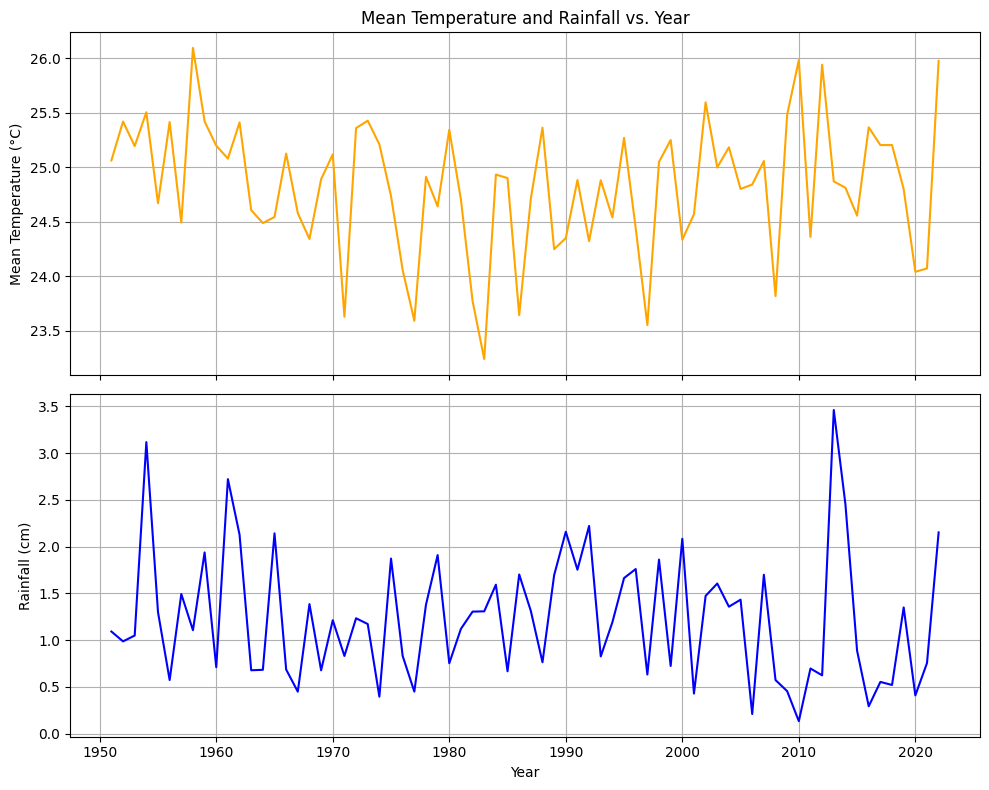

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Line plot for Mean Temp
ax[0].plot(merged_df['year'], merged_df['Mean Temp'], color='orange', linestyle='-')
ax[0].set_ylabel('Mean Temperature (°C)')
ax[0].set_title('Mean Temperature and Rainfall vs. Year')
ax[0].grid(True)

# Line plot for Rainfall
ax[1].plot(merged_df['year'], merged_df['RAINFALL'], color='blue', linestyle='-')
ax[1].set_ylabel('Rainfall (cm)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [31]:
merged_df['Decade'] = (merged_df['year'] // 10)*10
decade_results_1 = {}

for decade, data in merged_df.groupby('Decade'):
    start,end = data['year'].min(), data['year'].max()
    x_values = np.arange(start, end+1)
    temp_slope, temp_intercept = linregress(data['year'], data['Mean Temp'])[0:2]
    rain_slope, rain_intercept = linregress(data['year'], data['RAINFALL'])[0:2]
    temp_mk_test = mk.original_test(data['Mean Temp'])
    rain_mk_test = mk.original_test(data['RAINFALL'])

    decade_results_1[decade] = {
        'temp_slope': temp_slope,
        'temp_intercept': temp_intercept,
        'rain_slope': rain_slope,
        'rain_intercept': rain_intercept,
        'temp_mk_test': temp_mk_test,
        'rain_mk_test': rain_mk_test,
        'x_values': x_values
    }

full_temp_slope, full_temp_intercept = linregress(merged_df['year'], merged_df['Mean Temp'])[0:2]
full_rain_slope, full_rain_intercept = linregress(merged_df['year'], merged_df['RAINFALL'])[0:2]
x_values_full = np.arange(merged_df['year'].min(), merged_df['year'].max()+1)

full_temp_mk_test = mk.original_test(merged_df['Mean Temp'])
full_rain_mk_test = mk.original_test(merged_df['RAINFALL'])

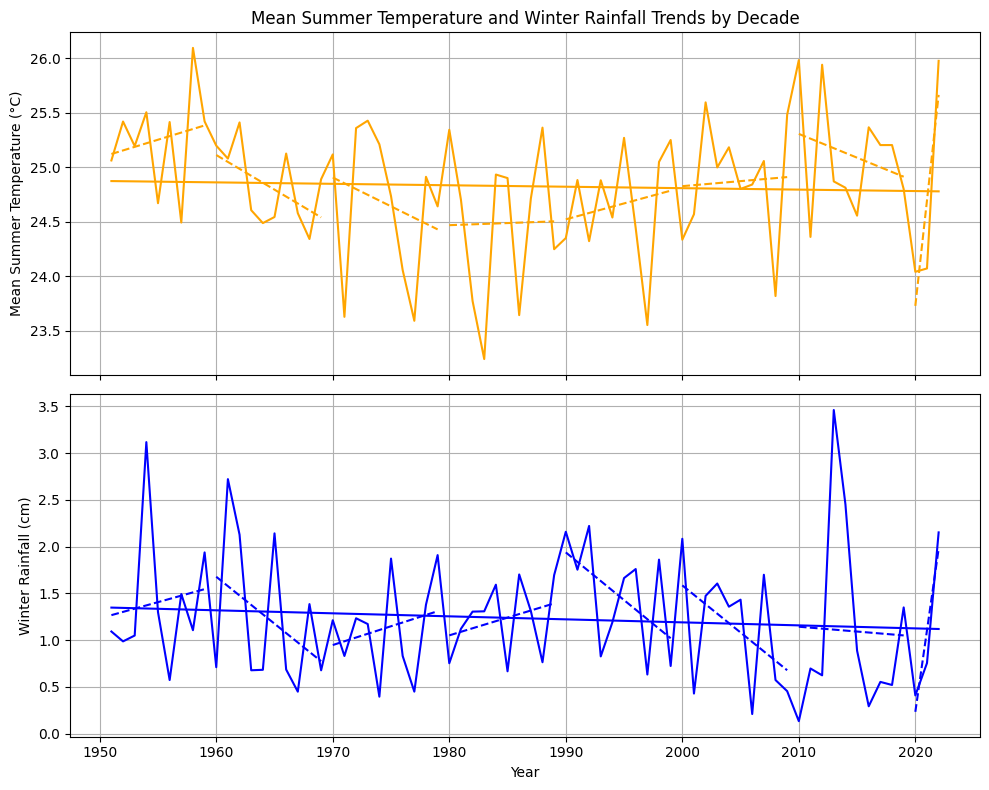

Mann-Kendall Test Results:
Full period Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.468865731616952, z=-0.7243258157237968, Tau=-0.05868544600938967, s=-150.0, var_s=42316.0, slope=-0.002516471181038815, intercept=24.971322388538717)
Full period Rainfall trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.40581928169739556, z=-0.8312732516024782, Tau=-0.06729264475743349, s=-172.0, var_s=42316.0, slope=-0.0032057209355860214, intercept=1.2965421747367885)
1950s Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.6021675277481957, z=0.5212860351426869, Tau=0.16666666666666666, s=6.0, var_s=92.0, slope=0.04011270257293227, intercept=25.254262236298107)
1950s Rainfall trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.34808262363292397, z=0.9383148632568366, Tau=0.2777777777777778, s=10.0, var_s=92.0, slope=0.06472953695945707, intercept=0.8481846380011465)
1960s Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.15240628395

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(merged_df['year'], merged_df['Mean Temp'], color='orange', linestyle='-', label='Mean Temperature')
ax[0].set_ylabel('Mean Summer Temperature (°C)')
ax[0].set_title('Mean Summer Temperature and Winter Rainfall Trends by Decade')
ax[0].grid(True)

for decade, results in decade_results_1.items():
    temp_y_values = results['temp_slope'] * results['x_values'] + results['temp_intercept']
    ax[0].plot(results['x_values'], temp_y_values, color='orange', linestyle='--', label=f'{decade}s Temp Trend')

full_temp_y_values = full_temp_slope * x_values_full + full_temp_intercept
ax[0].plot(x_values_full, full_temp_y_values, color='orange', linestyle='-', linewidth=1.5, label='Overall Temp Trend')


ax[1].plot(merged_df['year'], merged_df['RAINFALL'], color='blue', linestyle='-', label='Rainfall')
ax[1].set_ylabel('Winter Rainfall (cm)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

for decade, results in decade_results_1.items():
    rain_y_values = results['rain_slope'] * results['x_values'] + results['rain_intercept']
    ax[1].plot(results['x_values'], rain_y_values, color='blue', linestyle='--', label=f'{decade}s Rain Trend')

full_rain_y_values = full_rain_slope * x_values_full + full_rain_intercept
ax[1].plot(x_values_full, full_rain_y_values, color='blue', linestyle='-', linewidth=1.5, label='Overall Rain Trend')

plt.tight_layout()
plt.show()

print("Mann-Kendall Test Results:")
print(f"Full period Temperature trend: {full_temp_mk_test}")
print(f"Full period Rainfall trend: {full_rain_mk_test}")
for decade, results in decade_results_1.items():
    print(f"{decade}s Temperature trend: {results['temp_mk_test']}")
    print(f"{decade}s Rainfall trend: {results['rain_mk_test']}")

In [33]:
monthly_data['month_year'] = monthly_data.index.astype(str)
monthly_data

,Min Temp,Max Temp,Mean Temp,RAINFALL,month_year
year_month,,,,,
1951-01,3.967419,15.801935,9.884677,1.495463,1951-01
1951-02,5.838214,19.208929,12.523571,0.647581,1951-02
1951-03,10.764839,23.542581,17.153710,2.439290,1951-03
1951-04,13.592667,26.587000,20.089833,0.139405,1951-04
1951-05,19.187097,32.264839,25.725968,1.566789,1951-05
...,...,...,...,...,...
2022-08,21.716387,28.869290,25.292838,13.266669,2022-08
2022-09,20.038050,27.607955,23.823002,11.473897,2022-09
2022-10,15.340149,25.500540,20.420344,3.875470,2022-10


In [34]:
features_and_ndsi = pd.merge(monthly_data, df_ndsi, on='month_year')
features_and_ndsi

,Min Temp,Max Temp,Mean Temp,RAINFALL,month_year,percentile_25,median,percentile_75
0,15.261000,29.096667,22.178833,0.085958,2013-04,0.305766,0.455720,0.758753
1,19.819677,33.819355,26.819516,0.413366,2013-05,0.450295,0.665620,0.739386
2,21.103000,29.616667,25.359833,31.586529,2013-06,0.158434,0.226039,0.761798
3,21.582258,28.522258,25.052258,20.653476,2013-07,0.120121,0.249820,0.839165
4,20.858064,27.880000,24.369032,24.446940,2013-08,0.199601,0.267682,0.346562
...,...,...,...,...,...,...,...,...
112,21.716387,28.869290,25.292838,13.266669,2022-08,0.200044,0.238900,0.277116
113,20.038050,27.607955,23.823002,11.473897,2022-09,0.066875,0.244405,0.424864
114,15.340149,25.500540,20.420344,3.875470,2022-10,-0.083385,0.419238,0.796263
115,10.477897,22.618728,16.548313,0.000000,2022-11,0.490381,0.518314,0.564326


In [35]:
# Calculate Pearson correlation between two columns
correlation1 = features_and_ndsi['Mean Temp'].corr(features_and_ndsi['RAINFALL'], method='pearson')
correlation2 = features_and_ndsi['Mean Temp'].corr(features_and_ndsi['median'], method='pearson')
correlation3 = features_and_ndsi['RAINFALL'].corr(features_and_ndsi['median'], method='pearson')
# Print the result
print(f"Pearson correlation between Mean Temp and Rainfall: {correlation1}")
print(f"Pearson correlation between Mean Temp and Median NDSI: {correlation2}")
print(f"Pearson correlation between RAINFALL and Median NDSI: {correlation3}")

Pearson correlation between Mean Temp and Rainfall: 0.47554278980151987
Pearson correlation between Mean Temp and Median NDSI: -0.3338746880177234
Pearson correlation between RAINFALL and Median NDSI: -0.3592279383250336


In [36]:
features_and_ndsi.to_csv("data/model_input.csv")